In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

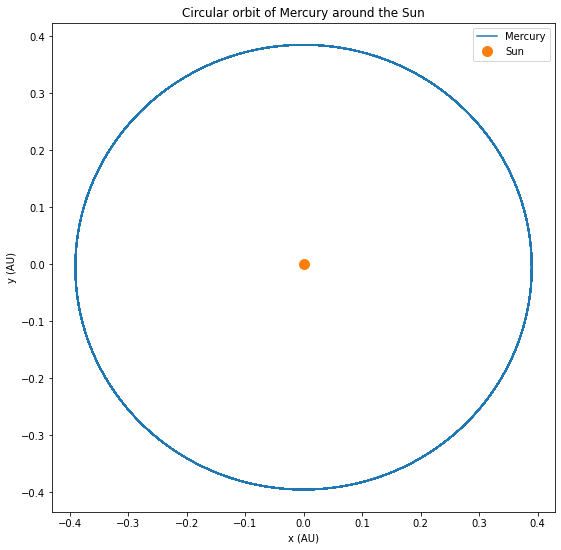

In [ ]:
G = 4*np.pi**2  # gravitational constant

M_sun = 1.0     # solar mass

M_m = 1.65e-7  # mercury's mass

r0 = np.array([0.39, 0])

v0 = np.array([0, 10.06])

dt = 0.001

T = 10  # number of periods


def euler_cromer(r0, v0, dt, T):

    r = r0

    v = v0

    positions = [r0]


    for i in range(int(T/dt)):

        a = -G*M_sun*r/np.linalg.norm(r)**3

        v = v + a*dt

        r = r + v*dt

        positions.append(r)

    return np.array(positions)


positions = euler_cromer(r0, v0, dt, T)


plt.subplots(figsize=(9, 9))
plt.plot(positions[:, 0], positions[:, 1], label='Mercury')
plt.plot(0, 0, 'o', markersize=10, label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Circular orbit of Mercury around the Sun')
plt.legend()
plt.show()

Adding an eccentricity of e = 0.206, and a v0 of 9.162 AU/year that yields a circular orbit, the following code has an initial velocity just below the circular velocity to display the elliptical orbit.

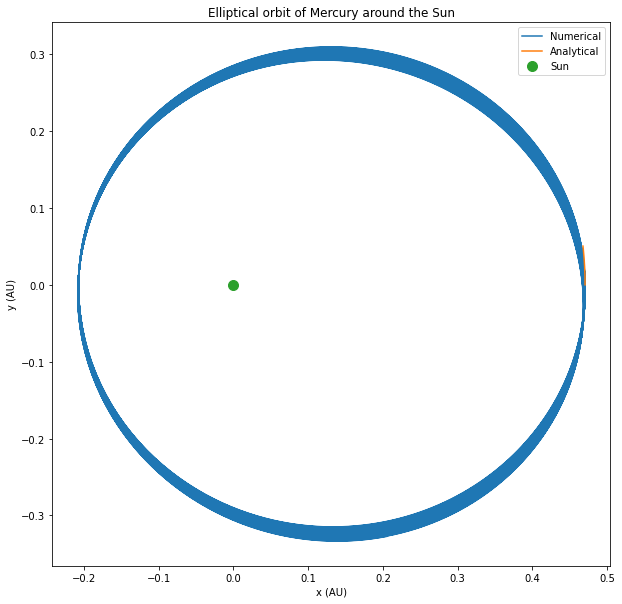

In [ ]:
a = 0.39
e = 0.206
major = 0.39*(1 + e)  # Semi-major axis
minor = major*np.sqrt(1 - e**2)  # Semi-minor axis

r0 = np.array([a*(1 + e), 0])
v0 = np.array([0, np.sqrt(G/(a*(1 + e))) - 2 ])

positions = euler_cromer(r0, v0, dt, T)

t = np.linspace(0, T, int(T/dt))
analytical_x = major*np.cos(np.radians(2*np.pi*t/T))
analytical_y = minor*np.sin(np.radians(2*np.pi*t/T))



plt.subplots(figsize=(10, 10))
plt.plot(positions[:, 0], positions[:, 1], label='Numerical')
plt.plot(analytical_x, analytical_y, label='Analytical')
plt.plot(0, 0, 'o', markersize=10, label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Elliptical orbit of Mercury around the Sun')
plt.legend()
plt.show()

The elliptical orbit can be seen now that the initial velocity deviated from the initial velocity for circular motion. The analytical expression for the orbit is just above the numerically plotted one, they are very simlar in accuracy, so they cover each other up (the orange line shows the start of the analytical expression).

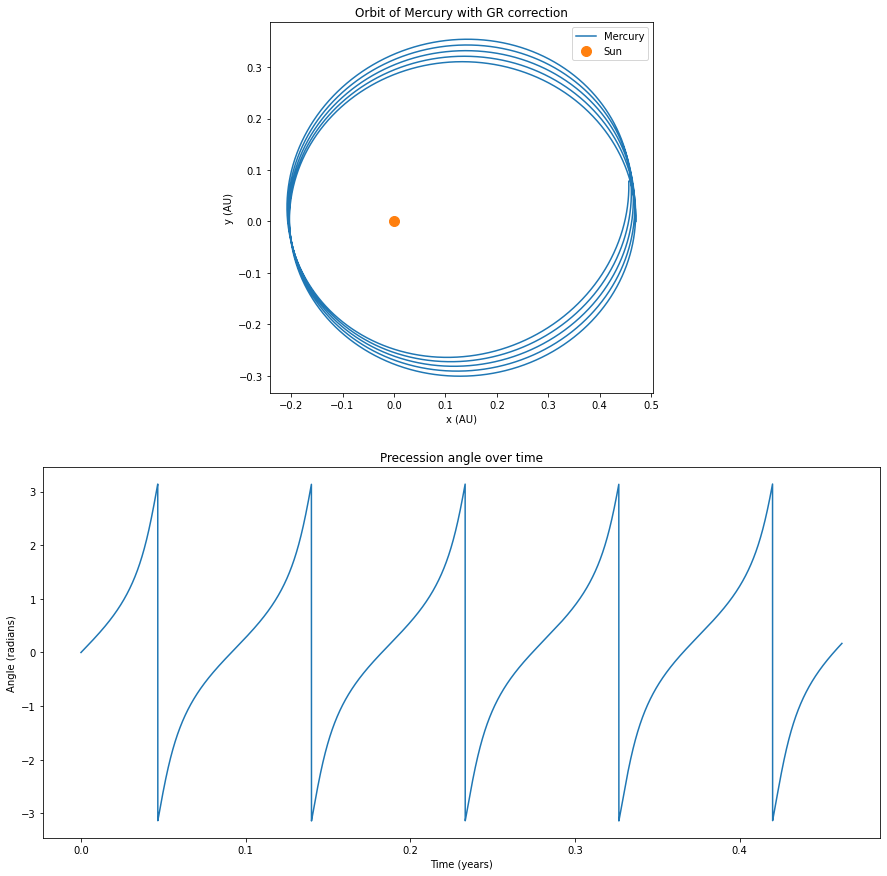

Precession angle: 9.7038 degrees
Precession rate: 17.5018 arcseconds per century


In [ ]:
r0 = np.array([0.39*(1+0.206), 0])

v0 = np.array([0, np.sqrt(G/(a*(1 + .206))) - 2 ])

dt = 0.0001

period = 3

alpha = 0.001

# same initial conditions as part b

# Euler-Cromer with GR correction

def euler_cromer_gr(r0, v0, dt, period):

    position = [r0]

    theta = []

    r = r0

    v = v0

    for i in range(int(period/dt)):

        a = -G*M_sun*r/np.linalg.norm(r)**3 * (1 + alpha/np.linalg.norm(r)**2)

        v = v + a*dt

        r = r + v*dt

        position.append(r)

        theta.append(math.atan2(r[1], r[0]))

    return np.array(position), np.array(theta)


position, theta = euler_cromer_gr(r0, v0, dt, T)
time = np.linspace(0, T, len(theta))

angles = np.arctan2(position[:,1], position[:,0])
d_angles = np.diff(angles)

precession_angle = np.abs(np.sum(d_angles))

# precession rate in arcseconds per century
T = period*2*np.pi*np.sqrt((r0[0]**3)/(G*M_sun))


precession_rate = precession_angle*100/(T)


time = np.linspace(0, period*T/(2*np.pi), len(position))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

ax1.plot(position[:, 0], position[:, 1], label='Mercury')
ax1.plot(0, 0, 'o', markersize=10, label='Sun')
ax1.set_aspect('equal')
ax1.set_xlabel('x (AU)')
ax1.set_ylabel('y (AU)')
ax1.set_title('Orbit of Mercury with GR correction')
ax1.legend()



ax2.plot(time, angles)
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Angle (radians)')
ax2.set_title('Precession angle over time')
plt.show()

print(f"Precession angle: {precession_angle*180/np.pi:.4f} degrees")
print(f"Precession rate: {precession_rate:.4f} arcseconds per century")

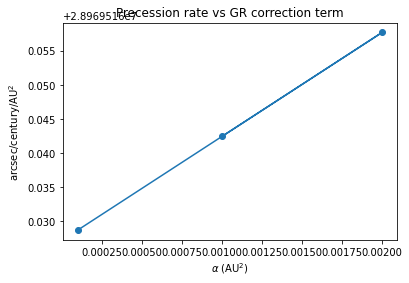

In [ ]:
M_mercury = 1.65e-7  # Mercury's mass
r0 = np.array([0.39*(1 + 0.206), 0])
v0 = np.array([0, np.sqrt(G/(a*(1 + .206))) - 2 ])
dt = 0.001
num_periods = 5  # Number of periods to simulate


def calc_precession_rate(alpha):

    def gravitational_force(r):

        r_mag = np.linalg.norm(r)

        return -G*M_sun*M_mercury*r/r_mag**3 * (1 + alpha/r_mag**2)


    r, v = np.copy(r0), np.copy(v0)

    positions = [r]
    precession_angles = []

    for i in range(int(num_periods/dt)):

        a = gravitational_force(r)
        v += a*dt
        r += v*dt
        positions.append(r)

        #  precession angle
        if i*dt % 1 == 0:

            theta = np.arctan2(r[1], r[0])

            precession_angles.append(theta)

    # precession rate
    precession_rate = np.mean(np.diff(precession_angles))*365*3600*180/np.pi

    return precession_rate


alphas = [0.001, 0.002, 0.0001]

precession_rates = []


for alpha in alphas:

    precession_rate = calc_precession_rate(alpha)

    precession_rates.append(precession_rate)


plt.subplots()
plt.plot(alphas, precession_rates, 'o-')
plt.xlabel(r'$\alpha$ (AU$^2$)')
plt.ylabel(r'arcsec/century/AU$^2$')
plt.title('Precession rate vs GR correction term')
plt.show()


alpha = 1.1e-8
precession_rate = calc_precession_rate(alpha)

rate of precession of approximately 43.2 arcsec/100y